### Expert Notebook: Spark processing
In this notebook, we will demonstrate some basic elements of the Spark cluster for parallel processing.

In [1]:
from catalogclient import catalog                         # to interrogate the catalog
import datetime as dt                                     # date and time functions  
import re                                                 # to parse strings (regular expressions)
import os                                                 # operating system functions
from xml.etree import ElementTree as ET                   # XML parsing
import rasterio                                           # raster files 
import matplotlib.pyplot as mplot                         # plotting functions
from mpl_toolkits.axes_grid1 import make_axes_locatable   # more plotting functions
import seaborn as sns                                     # additional plotting tools
import glob                                               # alternative for os to search for files/directories
import numpy as np                                        # standard Python package
import matplotlib.pyplot as plt                           # standard Python plotting routine
import gdal                                               # gdal package 

#call the catalogue client
cat=catalog.Catalog()

In [2]:
# Routine to calculate the histogram for a given (single band) GeoTiff image file.
def histogram(image_file):
    # Open the image file
    img = gdal.Open(image_file)
    
    if img is None:
        print ('-ERROR- Unable to open image file "%s"' % image_file)
    
    # Open raster band (first band)
    raster = img.GetRasterBand(1)    
    xSize  = img.RasterXSize
    ySize  = img.RasterYSize
    print(img.GetMetadata())
    
    # Read raster data
    data = raster.ReadAsArray(0, 0, xSize, ySize)
    
    #convert DN --> real NDVI values
    data[data == 255] = np.ma.masked
    data = data * 0.004 - 0.08 #check if these are the right scale and offset factors...
        
    # Calculate histogram, let's ignore the negative NDVI values
    hist, _ = np.histogram(data, bins=25, range=(0.00, 1.00))
    hist    = (100. * hist) / np.sum(hist)
    print(hist.shape)
    
    return hist

First, we query the catalogue for Sentinel-2 10 m NDVI files and have the list printed.

In [3]:
productName = 'CGS_S2_NDVI_10M' 
startDate = dt.date(2018,7,1)
endDate   = dt.date(2018,8,31)
minLatitude  = 50.5 #in decimal degrees, positive for North
maxLatitude  = 51.5
minLongitude = 3 #in decimal degrees, positive for East
maxLongitude = 4.6

#get the product list
listOfProducts = cat.get_products (productName, 
                            fileformat='GEOTIFF', 
                            startdate=startDate, 
                            enddate=endDate, 
                            min_lon=minLongitude, 
                            max_lon=maxLongitude, 
                            min_lat=minLatitude, 
                            max_lat=maxLatitude)

p = listOfProducts[0]

In [4]:
p.bands()

['NDVI', 'SCENECLASSIFICATION', 'CLOUDMASK', 'SHADOWMASK']

In [5]:
p.file('NDVI')

'file:/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/07/15/S2B_20180715T105029Z_31UFT_CGS_V102_000/S2B_20180715T105029Z_31UFT_NDVI_V102/10M/S2B_20180715T105029Z_31UFT_NDVI_10M_V102.tif'

In [6]:
NDVIfiles = [p.file('NDVI')[5:] for p in listOfProducts if '31UES' in p.file('NDVI')]
NDVIfiles

['/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/08/17/S2B_20180817T105619Z_31UES_CGS_V102_000/S2B_20180817T105619Z_31UES_NDVI_V102/10M/S2B_20180817T105619Z_31UES_NDVI_10M_V102.tif',
 '/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/07/02/S2B_20180702T104019Z_31UES_CGS_V102_000/S2B_20180702T104019Z_31UES_NDVI_V102/10M/S2B_20180702T104019Z_31UES_NDVI_10M_V102.tif',
 '/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/07/27/S2A_20180727T104021Z_31UES_CGS_V102_000/S2A_20180727T104021Z_31UES_NDVI_V102/10M/S2A_20180727T104021Z_31UES_NDVI_10M_V102.tif',
 '/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/08/31/S2B_20180831T104019Z_31UES_CGS_V102_000/S2B_20180831T104019Z_31UES_NDVI_V102/10M/S2B_20180831T104019Z_31UES_NDVI_10M_V102.tif',
 '/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/08/11/S2B_20180811T104019Z_31UES_CGS_V102_000/S2B_20180811T104019Z_31UES_NDVI_V102/10M/S2B_20180811T104019Z_31UES_NDVI_10M_V102.tif',
 '/data/MTDA/CGS_S2/CGS_S2_NDVI/2018/07/18/S2B_20180718T110039Z_31UES_CGS_V102_000/S2B_20180718T110039Z_31UES_NDVI_V102/10M/S2B_20180718T110039Z_

In [7]:
len(NDVIfiles)

37

Store the obtained files in a new list NDVIfiles.

{'AREA_OR_POINT': 'Area'}
(25,)


Text(0,0.5,'Relative frequency [%]')

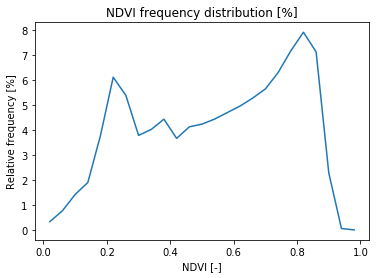

In [8]:
hist = histogram(NDVIfiles[0])
mplot.title('NDVI frequency distribution [%]')

#histogram function was defined to collect the NDVI data in 25 bins within the range [0.00, 1.00]
mplot.plot(np.arange(0, np.size(hist)) * 0.04 + 0.02, hist)
mplot.xlabel('NDVI [-]')
mplot.ylabel('Relative frequency [%]')

Here we calculate a cumulative histogram for all the NDVI files in the list.

{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_OR_POINT': 'Area'}
(25,)
{'AREA_O

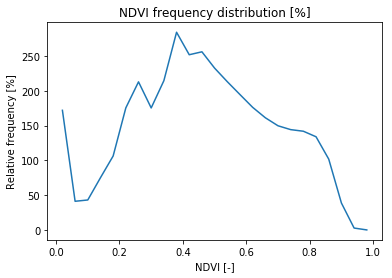

In [9]:
%%time
for i in range(0, np.size(hist)):
    hist[i]=0
for f in NDVIfiles:
    hist = hist + histogram(f)

mplot.title('NDVI frequency distribution [%]')
mplot.plot(np.arange(0, np.size(hist)) * 0.04 + 0.02, hist)
mplot.xlabel('NDVI [-]')
mplot.ylabel('Relative frequency [%]')

So, this took quite some time to complete. Let's see if we can get the job done sooner if we use the SPARK cluster and do parallel processing. Of course, this is not really a representative example. The time gained will of course increase if you really have LOTS of files to process. 

To work on the processing cluster, we need to specify the resources we want:

* <b>spark.yarn.executor.memoryOverhead</b>: memory available for Python
* <b>spark.executor.cores</b>: Number of cores per executor. Usually our tasks are single threaded, so 1 is a good default.
* <b>spark.executor.memory</b>: memory to assign per executor. Memory available for Spark and Java, this can be small when most of your processing is in Python.

We set up the SparkConf with these parameters, and create a SparkContext sc, which will be our access point to the cluster.


In [10]:
from operator import add
import pyspark
import os
os.environ['PYSPARK_PYTHON']='/usr/bin/python3.5'

# Setup the Spark cluster
print( 'Configuring' ) 
conf = pyspark.SparkConf()
conf.set('spark.yarn.executor.memoryOverhead', '1g')
print( 'Memory overhead' )
conf.set('spark.executor.memory', '1g')
print( 'Memory 1g' )
print( 'Configuring - this may take some time' )
%time sc = pyspark.SparkContext.getOrCreate(conf=conf)

Configuring
Memory overhead
Memory 1g
Configuring - this may take some time
CPU times: user 12.2 ms, sys: 22.5 ms, total: 34.7 ms
Wall time: 13.9 s


<div class="alert alert-block alert-warning">
Please pay attention to the second argument in this method call:
 sc.parallelize(NDVIfiles,len(NDVIfiles))
It specifies the number of 'partitions' that Spark has to use. Partitions can be processed in parallel, so if the number is too low, your job will take a long time to run.
In general, if the work per file is more than one second, it is safe to use as many partitions as there are files.
</div>

In [11]:
%%time

def runInSpark():
    filesRDD = sc.parallelize(NDVIfiles,len(NDVIfiles))

    # Apply the 'histogram' function to each filename using 'map'
    hists = filesRDD.map(histogram)

    # Combine distributed histograms into a single result
    total = list(hists.reduce(lambda h, i: map(add, h, i)))
    return total
%timeit -n1 runInSpark()

7.23 s ± 4.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
CPU times: user 71.1 ms, sys: 29.4 ms, total: 101 ms
Wall time: 50.6 s


In [12]:
total = runInSpark()

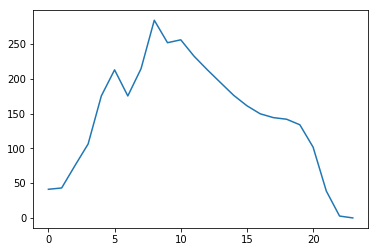

In [13]:
plt.plot(total[1:254])

In [14]:
# are the results the same?
difference = hist - total

for i in range(len(hist)):
    print( i, hist[i], total[i], difference[i] )
print( "difference:" )
print( difference )
c=0
for p in difference:
    c=c+p
if c==0:
    print("Yes, they are the same!")
else:
    print("They're not the same? How come?")

0 172.01760074795777 172.01760074795777 0.0
1 41.183014421121825 41.183014421121825 0.0
2 43.05906246732983 43.05906246732983 0.0
3 75.08300094509102 75.08300094509102 0.0
4 106.32036059352967 106.32036059352967 0.0
5 175.52181711346125 175.52181711346125 0.0
6 212.95902429561872 212.95902429561872 0.0
7 175.43564205620322 175.43564205620322 0.0
8 214.63749885795227 214.63749885795227 0.0
9 284.30548445322114 284.30548445322114 0.0
10 251.963878475615 251.963878475615 0.0
11 256.166092822252 256.166092822252 0.0
12 232.70584899177925 232.70584899177925 0.0
13 213.20669080959593 213.20669080959593 0.0
14 194.6855931331708 194.6855931331708 0.0
15 176.31561695687878 176.31561695687878 0.0
16 161.32717478727554 161.32717478727554 0.0
17 149.77943053754439 149.77943053754439 0.0
18 144.24449807922724 144.24449807922724 0.0
19 141.9286591934282 141.9286591934282 0.0
20 133.96775643905332 133.96775643905332 0.0
21 101.83008765003083 101.83008765003083 0.0
22 38.67005816477707 38.670058164777

In [15]:
sc.stop()